In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


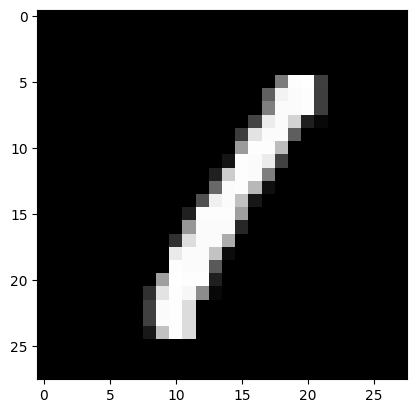

In [3]:
x_train[0].shape
plt.imshow(x_train[3], cmap='gray')

In [4]:
y_train[0].shape

()

In [5]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)   
x_train_flattened[0]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [6]:
x_train_flattened.shape

(60000, 784)

In [53]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10,  activation='sigmoid'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8008 - loss: 6.7590
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8978 - loss: 0.4229
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9237 - loss: 0.3025
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9341 - loss: 0.2517
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9424 - loss: 0.2301


In [58]:
model.evaluate(x_train, y_test)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 60000
'y' sizes: 10000


7

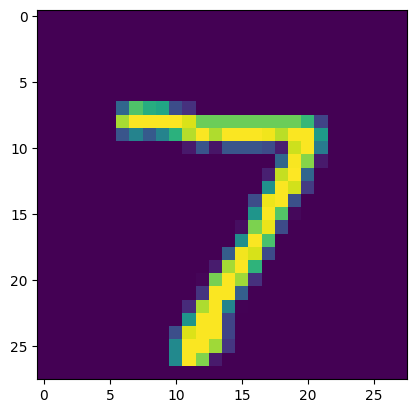

In [59]:
plt.imshow(x_test[0])
y_test[0]

In [61]:
y_predicted = model.predict(x_test)
np.argmax(y_predicted[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step


1

In [45]:
predicted_labels = [np.argmax(i) for i in y_predicted]

In [46]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 908,    2,    5,    0,    0,    1,    2,    0,   58,    4],
       [   4, 1106,    2,    0,    0,    0,    1,    0,   22,    0],
       [  65,  544,  382,    2,    0,    0,    1,    0,   36,    2],
       [ 742,  231,    8,   12,    0,    1,    0,    1,   15,    0],
       [ 894,   27,   15,    0,   32,    1,    0,    1,    6,    6],
       [ 846,   14,    1,    9,    0,    9,    1,    0,   12,    0],
       [ 919,   16,    1,    1,    3,    2,    8,    0,    8,    0],
       [ 408,  522,   32,    1,   43,    0,    0,    8,   10,    4],
       [  77,    3,   21,   14,    1,    4,    1,    1,  851,    1],
       [ 744,   73,  110,    5,   18,    0,    0,    2,   12,   45]])>

Text(95.72222222222221, 0.5, 'Truth')

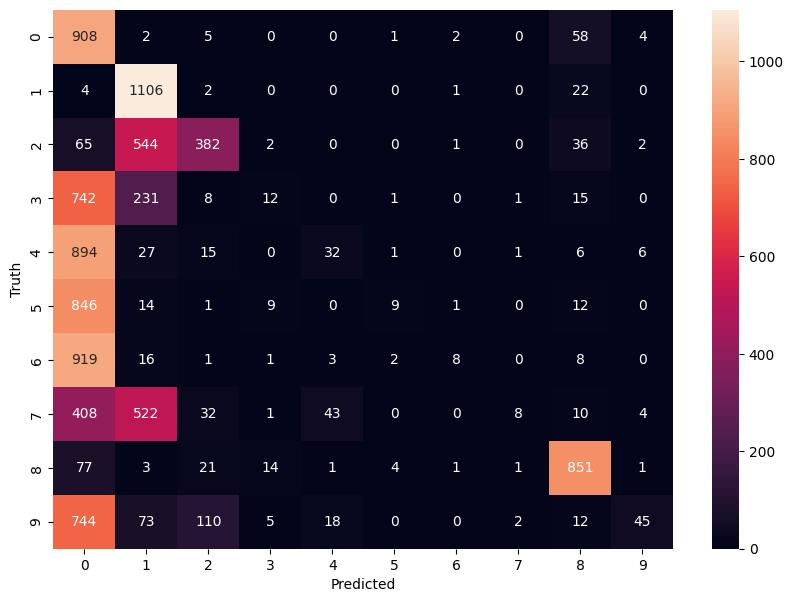

In [47]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')